In [1]:
%matplotlib inline
import os
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

In [2]:
docs = []  # list with documents
doc_names = [] # doc names with same index as docs
links = []
sample_seed = 2017
raw_data_folder = 'aminer_org_v1'
sample_size = 1000

data_path = os.path.join(os.getcwd(), 'raw_data.tmp', raw_data_folder)
with open(os.path.join(data_path, 'texts.txt'), 'r', encoding='utf8') as f:
    for line in f:
        line = line.split(' ')
        doc_names.append(line[0])
        docs.append(' '.join(line[1:]))

doc_names_set = set(doc_names)
links = []
with open(os.path.join(data_path, 'links.txt'), 'r', encoding='utf8') as f:
    for line in f:
        line = line.strip().split(' ')
        links.append([l for l in line[1:] if l in doc_names_set])  # only add links that are present in doc_names

Counter({0: 35438,
         1: 26595,
         2: 15980,
         3: 10157,
         4: 6879,
         5: 4742,
         6: 3233,
         7: 2294,
         8: 1592,
         9: 1102,
         10: 796,
         11: 540,
         12: 409,
         13: 284,
         14: 196,
         15: 150,
         16: 132,
         17: 87,
         18: 74,
         19: 61,
         20: 52,
         21: 26,
         22: 24,
         23: 21,
         24: 14,
         25: 20,
         26: 10,
         27: 11,
         28: 9,
         29: 9,
         30: 11,
         31: 3,
         32: 3,
         33: 2,
         34: 4,
         35: 4,
         36: 2,
         37: 3,
         38: 5,
         39: 2,
         40: 3,
         41: 2,
         42: 1,
         43: 1,
         45: 1,
         46: 4,
         48: 1,
         55: 1,
         57: 1,
         60: 2,
         61: 1,
         64: 1,
         67: 1,
         74: 1,
         78: 1,
         83: 1,
         102: 1})

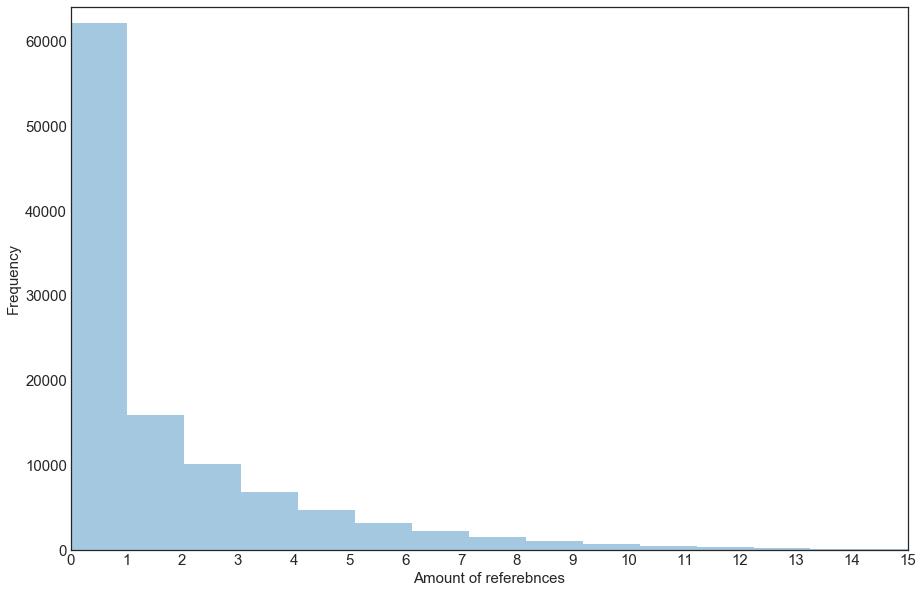

In [3]:
from collections import Counter
numbers_of_links = [len(l) for l in links]

plt.figure(figsize=(15,10))
distplot_ax = sns.distplot(numbers_of_links, hist=True, kde=False, bins=100)
distplot_ax.set_xlim(0,15)
distplot_ax.set_ylim(0,64000)
distplot_ax.set_xticks(range(16))
distplot_ax.tick_params(labelsize=15)
distplot_ax.set_xlabel('Amount of referebnces', fontsize=15)
distplot_ax.set_ylabel('Frequency', fontsize=15)
Counter(numbers_of_links)

In [4]:
if 0 < sample_size < len(doc_names):
    np.random.seed(sample_seed)
    # choices = np.random.choice(len(docs), sample_size, replace=False)
    # docs = [docs[choice] for choice in choices]
    # doc_names = [doc_names[choice] for choice in choices]
    # links = [links[choice] for choice in choices]  # assumes same order of text and link file!

    # sample using buckets from len(..

    numbers_of_links = [len(l) for l in links]
    bin_limits = [(0, 5), (5, 10), (10, 15), (15, 20), (20, 99999)]
    doc_indices = []

    per_bin_sample_size = int(sample_size / len(bin_limits))

    for bin_lower_limit, bin_upper_limit in bin_limits:
        # don't sample no links
        indices_in_bin = [i for i, v in enumerate(numbers_of_links) if (bin_upper_limit >= v > bin_lower_limit)]
        print(bin_lower_limit, len(indices_in_bin))
        if per_bin_sample_size > len(indices_in_bin):
            print("per_bin_sample_size > len(indices_in_bin)")
            choices = indices_in_bin
        else:
            choices = np.random.choice(indices_in_bin, per_bin_sample_size, replace=False)
        doc_indices.extend(choices)

    target_doc_indices = []
    print(len(doc_indices))
    for doc_index in doc_indices:  # add target docs from links
        target_doc_indices.extend([doc_names.index(ti) for ti in links[doc_index]])
    doc_indices.extend(target_doc_indices)

    print('Final number of docs: ', len(doc_indices))
    docs = [docs[choice] for choice in doc_indices]
    doc_names = [doc_names[choice] for choice in doc_indices]
    links = [links[choice] for choice in doc_indices]  # assumes same order of text and link file!

    # Based on some inverse of PDF
    # counter = Counter(numbers_of_links).items()
    # counts = [c[0] for c in counter]
    # sample_pdf = np.array([1 - c[1] / len(numbers_of_links) for c in counter])
    # sample_pdf /= sum(sample_pdf)
    # samples_per_count = np.random.choice(len(counts), sample_size, replace=True)

temp_links = []
for doc_name, links_per_node in zip(doc_names, links):
    for link in links_per_node:
        temp_links.append((doc_name, link))
links = temp_links

0 64353
5 9017
10 1579
15 406
20 207
1000
Final number of docs:  14744
